# **E-Commerce & Retail B2B Classification Case Study**

*Problem Statement*

Schuster is a multinational retail company dealing in sports goods and accessories. Schuster conducts significant business with hundreds of its vendors, with whom it has credit arrangements. Unfortunately, not all vendors respect credit terms and some of them tend to make payments late. Schuster levies heavy late payment fees, although this procedure is not beneficial to either party in a long-term business relationship. The company has some employees who keep chasing vendors to get the payment on time; this procedure nevertheless also results in non-value-added activities, loss of time and financial impact. Schuster would thus try to understand its customers’ payment behaviour and predict the likelihood of late payments against open invoices.

*Goal*

Schuster would like to better understand the customers’ payment behaviour based on their past payment patterns (customer segmentation). Using historical information, it wants to be able to predict the likelihood of delayed payment against open invoices from its customers. It wants to use this information so that collectors can prioritise their work in following up with customers beforehand to get the payments on time.

Data Understanding

RECEIPT_METHOD In which method payments have been made

CUSTOMER_NAME Name of the customer/vendor

CUSTOMER_NUMBER Customer's unique identity number

RECEIPT_DOC_NO Reference number of the payment receipt

RECEIPT_DATE The date in which the payment has been made

CLASS As the payment against these invoices have already been received so Transaction Class as PMT (short for Payment) assigned

CURRENCY_CODE Currency used for the payment

Local Amount Invoice value in local currency

USD Amount Invoice Value converted to USD

INVOICE_ALLOCATED Invoice number that has been allocated to a particular vendor

INVOICE_CREATION_DATE The date on which the invoice was created

DUE_DATE The date by which the payment was to be made

PAYMENT_TERM Days given to the vendor/customer for making the payments

INVOICE_CLASS Three types of Invoice classes - Credit Memo or Credit Note (CM), Debit Memo or Debit Note (DM) or Invoice (INV)

INVOICE_CURRENCY_CODE Currency code as per the invoice generated

INVOICE_TYPE Invoice created for physical goods or services (non-goods)

Finally target variable will be derived based on the suggested information "You need to derive it by checking whether the payment receipt date falls within, or after the due date. By doing so, you can create your binary target variable as 1 or 0."




In [3]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [7]:
# Importing Received dataset and looking at the first 5 records
train = pd.read_csv("Received_Payments_Data.csv")
train.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DOC_NO,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
0,WIRE,C EA Corp,37403,1.421000e+10,20-Apr-21,PMT,USD,370990.92,101018.63040,14200000001,2-Nov-20,30-Dec-20,30 Days from EOM,INV,AED,Non Goods
1,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,183750.00,48990.21133,99200000043,29-Dec-20,28-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
2,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99210000003,30-Jan-21,1-Mar-21,30 Days from Inv Date,INV,SAR,Non Goods
3,WIRE,FARO Corp,1409,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000038,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
4,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000039,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods


In [8]:
##min, max and average value of invoice value in USD
print('minimum invoice value: ',train['USD Amount'].min())
print('maximum invoice value: ',train['USD Amount'].max())
print('average invoice value: ',np.round(train['USD Amount'].mean(),1))

minimum invoice value:  0.0
maximum invoice value:  10849828.8
average invoice value:  531201.3


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
train[['INVOICE_CREATION_DATE','DUE_DATE']] = train[['INVOICE_CREATION_DATE','DUE_DATE']].apply(pd.to_datetime)

In [12]:
#0: Delayed
#1: On time
#creating the target variable
train['target'] = np.where(train['INVOICE_CREATION_DATE']>train['DUE_DATE'], 0, 1)

In [13]:
#counts of unique values
train['target'].value_counts()

1    90263
0     3674
Name: target, dtype: int64

In [14]:
#average invoice value for delayed customers
print('Average Invoice value for delayed customers: ',np.round(train[train['target']==0]['USD Amount'].mean(),2))

Average Invoice value for delayed customers:  248782.34


In [15]:
#checking the basic information about the columns
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93937 entries, 0 to 93936
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   RECEIPT_METHOD         93937 non-null  object        
 1   CUSTOMER_NAME          93937 non-null  object        
 2   CUSTOMER_NUMBER        93937 non-null  int64         
 3   RECEIPT_DOC_NO         93908 non-null  float64       
 4   RECEIPT_DATE           93937 non-null  object        
 5   CLASS                  93937 non-null  object        
 6   CURRENCY_CODE          93937 non-null  object        
 7   Local Amount           93937 non-null  float64       
 8   USD Amount             93937 non-null  float64       
 9   INVOICE_ALLOCATED      93937 non-null  object        
 10  INVOICE_CREATION_DATE  93937 non-null  datetime64[ns]
 11  DUE_DATE               93937 non-null  datetime64[ns]
 12  PAYMENT_TERM           93937 non-null  object        
 13  I

<AxesSubplot:ylabel='Frequency'>

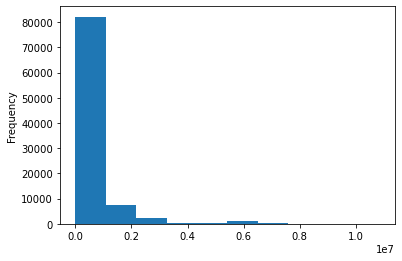

In [16]:
#Plotting the distribution of invoice value
train['USD Amount'].plot.hist()

In [17]:
import seaborn as sns
sns.set_theme(style="whitegrid")

<AxesSubplot:xlabel='target', ylabel='count'>

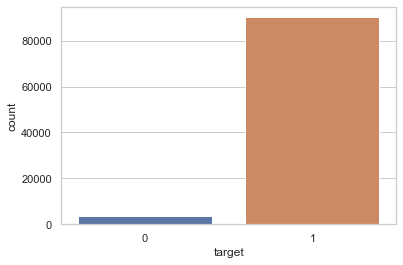

In [18]:
sns.countplot(x=train["target"])

In [19]:
c = train.target.value_counts()
p = np.round(train.target.value_counts(normalize=True)*100,2)
pd.concat([c,p], axis=1, keys=['counts', '%'])

,counts,%
1,90263,96.09
0,3674,3.91


Here we can see, approximately 4% of the customers are marked as 'Delayed' Clearly class imbalance is the isuue and we will deal it in the model building process

<AxesSubplot:xlabel='CLASS', ylabel='count'>

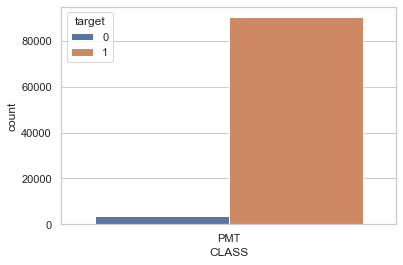

In [20]:
#delayed and on-time customer unique value counts with the payment class
sns.countplot(data=train, x="CLASS", hue="target")

In [21]:
#unique value counts of payment terms
train['PAYMENT_TERM'].value_counts()

60 Days from Inv Date                                      19870
30 Days from Inv Date                                      14672
60 Days from EOM                                           12518
30 Days from EOM                                           11306
15 Days from EOM                                            7544
Immediate Payment                                           5474
Immediate                                                   5261
90 Days from EOM                                            3893
45 Days from Inv Date                                       3550
45 Days from EOM                                            3509
90 Days from Inv Date                                       2211
100% Adv Payment                                            1241
25 DAYS FROM EOM                                             462
Cash on Delivery                                             418
15 Days from Inv Date                                        356
45 DAYS + EOM            

In [22]:
#unique value count distribution of invoice class
train['INVOICE_CLASS'].value_counts()

INV    88124
CM      5261
DM       552
Name: INVOICE_CLASS, dtype: int64

In [23]:
#unique value count distribution of invoice type
train['INVOICE_TYPE'].value_counts()

Goods        66715
Non Goods    27222
Name: INVOICE_TYPE, dtype: int64

<AxesSubplot:xlabel='INVOICE_CLASS', ylabel='count'>

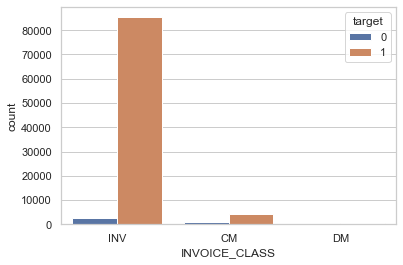

In [24]:
#delayed and on-time customer distribution across the invoice class categories
sns.countplot(data=train, x='INVOICE_CLASS', hue="target")

<AxesSubplot:xlabel='INVOICE_TYPE', ylabel='count'>

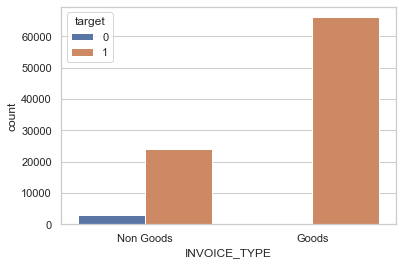

In [25]:
#delayed and on-time customer distribution across the invoice type categories
sns.countplot(data=train, x='INVOICE_TYPE', hue="target")

<AxesSubplot:xlabel='INVOICE_TYPE', ylabel='USD Amount'>

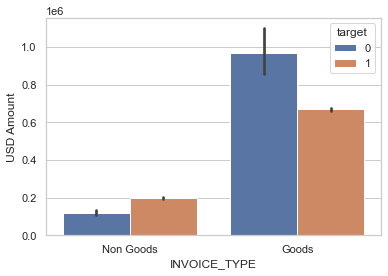

In [26]:
#Multivariate analysis
sns.barplot(data=train, x="INVOICE_TYPE", y="USD Amount", hue="target")

<AxesSubplot:xlabel='INVOICE_CLASS', ylabel='USD Amount'>

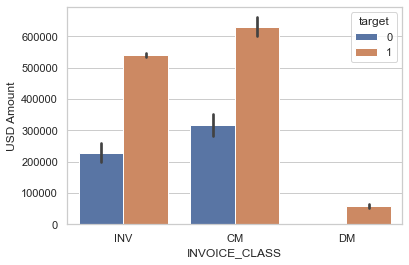

In [27]:
#Multivariate analysis
sns.barplot(data=train, x="INVOICE_CLASS", y="USD Amount", hue="target")

<AxesSubplot:ylabel='Frequency'>

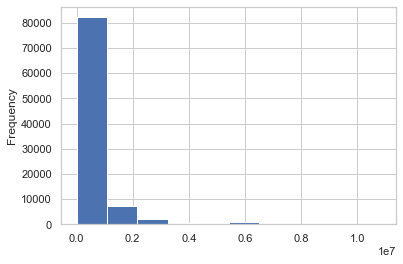

In [28]:
#distribution of the invoice amount(USD)
train['USD Amount'].plot(kind='hist')

In [29]:
#variable transformation
#method: cube root 
train['cbrt_USD_Amount'] = np.cbrt(train['USD Amount'])

<AxesSubplot:ylabel='Frequency'>

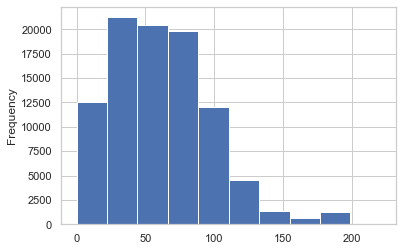

In [30]:
train['cbrt_USD_Amount'].plot(kind='hist')

In [31]:
#The age is calculated in days by taking the difference between Transaction Date and Due Date
train['age']=(train['INVOICE_CREATION_DATE']-train['DUE_DATE']).dt.days

In [32]:
train[train['target']==1].sample(5)

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DOC_NO,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,target,cbrt_USD_Amount,age
10852,PDC,FAKH Corp,1223,1.070000e+11,25-May-21,PMT,AED,10797.00,2.939959e+03,1.0721E+11,2021-03-22,2021-05-30,60 Days from EOM,INV,AED,Goods,1,14.325631,-69
22209,WIRE,SEPH Corp,2315,1.470000e+11,25-Feb-21,PMT,AED,2215089.44,2.215089e+06,1.472E+11,2020-12-16,2021-02-28,60 Days from EOM,INV,AED,Goods,1,130.355819,-74
43991,WIRE,SADD Corp,39604,1.510000e+11,30-May-21,PMT,SAR,97500.00,2.599481e+04,1.51215E+11,2021-05-24,2021-06-23,30 Days from Inv Date,INV,SAR,Goods,1,29.622988,-30
35104,WIRE,FARO Corp,1409,1.510000e+11,27-Jan-21,PMT,SAR,351231.80,9.364310e+04,1.5118E+11,2018-05-16,2018-06-15,15 Days from EOM,INV,SAR,Goods,1,45.410742,-30
54885,AP/AR Netting,L OR Corp,29420,1.540000e+11,21-Mar-21,PMT,AED,6333350.63,1.724534e+06,1.5421E+11,2021-02-28,2021-03-30,30 Days from Inv Date,INV,AED,Non Goods,1,119.919712,-30


Clustering - Customer Segmentation

Recommendation Given: Customer-level attributes could also be important independent variables to be included in the model. A customer-level attribute can be determined via customer segmentation. You have to segment your customers based on two derived variables: the average payment time in days for a customer and the standard deviation for the payment time. Using clustering techniques would result in a few distinct clusters of customers, which can be used as an input variable for the ML model.

In [34]:
clustering_data = train[['target','Local Amount','age','INVOICE_CLASS','INVOICE_CREATION_DATE']]

In [35]:
clustering_data = clustering_data.applymap(lambda s: s.lower() if type(s) == str else s)

In [36]:
clustering_data.columns= clustering_data.columns.str.lower()

In [37]:
clustering_data['std'] = clustering_data[['age','local amount']].std(axis=1)

In [38]:
clustering_data['target'] = clustering_data['target'].astype(str)

In [39]:
clustering_data = clustering_data.loc[clustering_data['age']<=1200]

In [40]:
median = clustering_data["age"].median()
clustering_data["age"] = np.where(clustering_data["age"] >400, median,clustering_data['age'])

In [41]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

In [42]:
# populate list of numerical and categorical variables
num_list = []
cat_list = []

for column in clustering_data:
    if is_numeric_dtype(clustering_data[column]):
        num_list.append(column)
    elif is_string_dtype(clustering_data[column]):
        cat_list.append(column)
        

print("numeric:", num_list)
print("categorical:", cat_list)

numeric: ['local amount', 'age', 'std']
categorical: ['target', 'invoice_class']


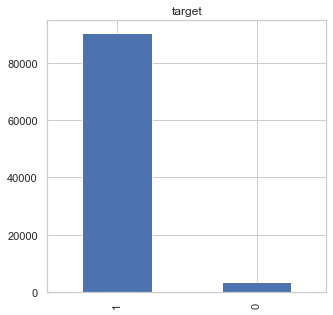

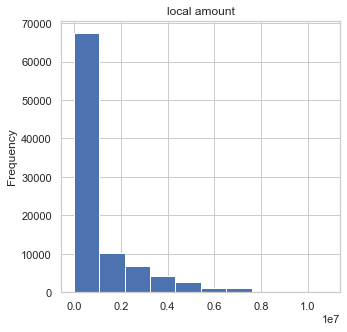

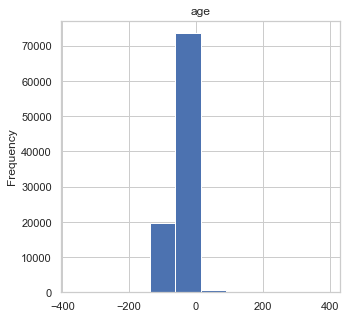

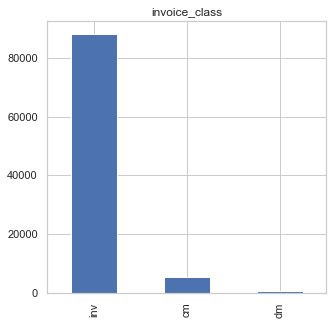

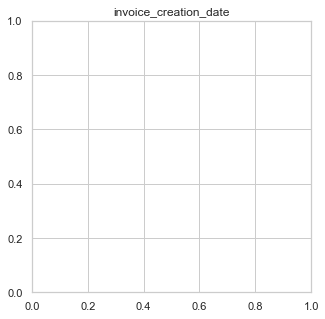

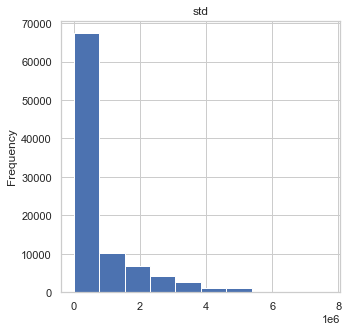

In [43]:
for column in clustering_data:
    plt.figure(column, figsize = (5,5))
    plt.title(column)
    if is_numeric_dtype(clustering_data[column]):
        clustering_data[column].plot(kind = 'hist')
    elif is_string_dtype(clustering_data[column]):
        # show only the TOP 10 value count in each categorical data
        clustering_data[column].value_counts()[:10].plot(kind = 'bar')

In [46]:
# encoding categorical variable
from sklearn.preprocessing import LabelEncoder

clustering_data['invoice_class'] = LabelEncoder().fit_transform(clustering_data["invoice_class"])

In [47]:
clustering_data.columns

Index(['target', 'local amount', 'age', 'invoice_class',
       'invoice_creation_date', 'std'],
      dtype='object')

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler


def data_scaler(scaler, var):
    scaled_var = "scaled_" + var
    model = scaler.fit(df[var].values.reshape(-1,1))
    df[scaled_var] = model.transform(df[var].values.reshape(-1, 1))
    
    plt.figure(figsize = (5,5))
    plt.title(scaled_var)
    df[scaled_var].plot(kind = 'hist')
    
    plt.figure(figsize = (5,5))
    plt.title(var)
    df[var].plot(kind = 'hist')

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

for var in ["age", "local amount"]:
    scaled_var = "scaled_" + var
    model = scaler.fit(clustering_data[var].values.reshape(-1,1))
    clustering_data[scaled_var] = model.transform(clustering_data[var].values.reshape(-1, 1))

<AxesSubplot:title={'center':'scaled_age'}, ylabel='Frequency'>

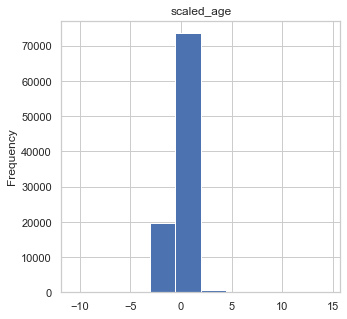

In [50]:
plt.figure(figsize = (5,5))
plt.title('scaled_age')
clustering_data['scaled_age'].plot(kind = 'hist')

<AxesSubplot:title={'center':'scaled_local amount'}, ylabel='Frequency'>

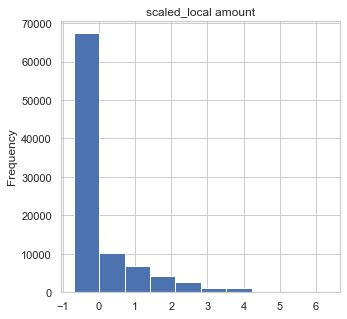

In [51]:
plt.figure(figsize = (5,5))
plt.title('scaled_local amount')
clustering_data['scaled_local amount'].plot(kind = 'hist')

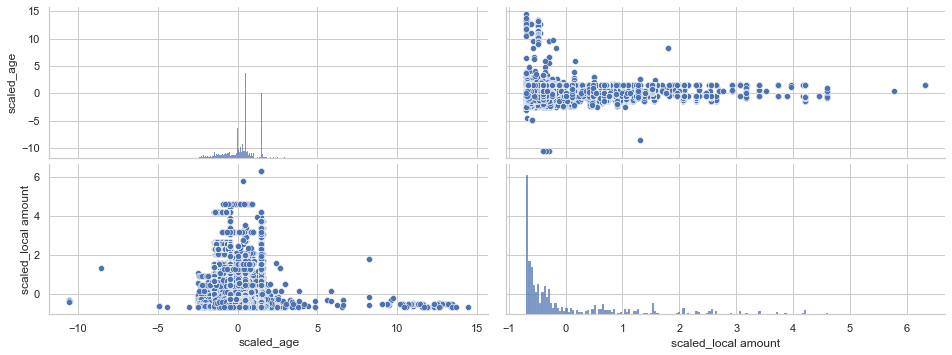

In [52]:
import seaborn as sns
columns = ['scaled_age','scaled_local amount']
#plt.figure(figsize = (10,20))
g = sns.pairplot(clustering_data[columns])
g.fig.set_size_inches(15,5)

In [53]:
# Load packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
sns.set_style('darkgrid')

In [54]:
X = np.array(clustering_data.loc[:,['std',                # Choose the variable names
                       'age']])    \
                        .reshape(-1, 2)

In [55]:
# Determine optimal cluster number with elbow method
wcss = []

In [56]:
for i in range(1, 11):
    model = KMeans(n_clusters = i,     
                    init = 'k-means++',                 # Initialization method for kmeans
                    max_iter = 300,                     # Maximum number of iterations 
                    n_init = 10,                        # Choose how often algorithm will run with different centroid 
                    random_state = 0)                   # Choose random state for reproducibility
    model.fit(X)                              
    wcss.append(model.inertia_)

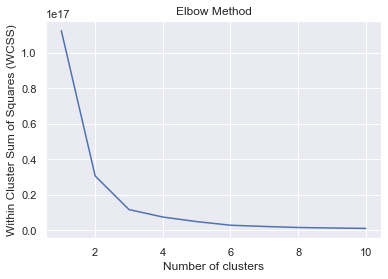

In [57]:
# Show Elbow plot
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')                               # Set plot title
plt.xlabel('Number of clusters')                        # Set x axis name
plt.ylabel('Within Cluster Sum of Squares (WCSS)')      # Set y axis name
plt.show()

In [58]:
kmeans = KMeans(n_clusters = 3,                 # Set amount of clusters
                init = 'k-means++',             # Initialization method for kmeans
                max_iter = 300,                 # Maximum number of iterations
                n_init = 10,                    # Choose how often algorithm will run with different centroid
                random_state = 0)               # Choose random state for reproducibility

pred_y = kmeans.fit_predict(X)

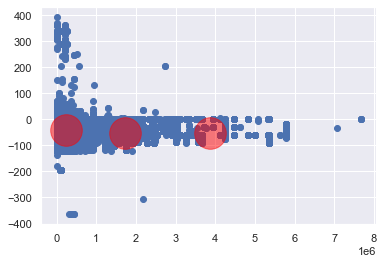

In [59]:
# Plot the data
plt.scatter(X[:,0], 
            X[:,1])

# Plot the clusters 
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=1000,                             # Set centroid size
            c='red',
           alpha=0.5)                           # Set centroid color
plt.show()

We can see that average days of the payment time are segmented in three main zones: 0-1 standard deviation of payment time, 2 standard deviation of payment time and 4 standard deviation of payment time

In [62]:
### Data Preparation
#dropping the date columns as the necessary information has been derived before
train = train.drop(['RECEIPT_DATE','DUE_DATE','INVOICE_CREATION_DATE'],axis=1)

In [64]:
train.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DOC_NO,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,target,cbrt_USD_Amount,age
0,WIRE,C EA Corp,37403,1.421000e+10,PMT,USD,370990.92,101018.63040,14200000001,30 Days from EOM,INV,AED,Non Goods,1,46.572958,-58
1,WIRE,RADW Corp,4003,9.921000e+10,PMT,SAR,183750.00,48990.21133,99200000043,30 Days from Inv Date,INV,SAR,Non Goods,1,36.590620,-30
2,WIRE,RADW Corp,4003,9.921000e+10,PMT,SAR,157500.00,41991.60971,99210000003,30 Days from Inv Date,INV,SAR,Non Goods,1,34.757952,-30
3,WIRE,FARO Corp,1409,9.921000e+10,PMT,SAR,157500.00,41991.60971,99200000038,30 Days from Inv Date,INV,SAR,Non Goods,1,34.757952,-30
4,WIRE,RADW Corp,4003,9.921000e+10,PMT,SAR,157500.00,41991.60971,99200000039,30 Days from Inv Date,INV,SAR,Non Goods,1,34.757952,-30


In [65]:
#making all lower-case
train = train.applymap(lambda s: s.lower() if type(s) == str else s)

In [66]:
train.columns

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DOC_NO',
       'CLASS', 'CURRENCY_CODE', 'Local Amount', 'USD Amount',
       'INVOICE_ALLOCATED', 'PAYMENT_TERM', 'INVOICE_CLASS',
       'INVOICE_CURRENCY_CODE', 'INVOICE_TYPE', 'target', 'cbrt_USD_Amount',
       'age'],
      dtype='object')

In [67]:
#making the header name lower-case
train.columns= train.columns.str.lower()
train.columns

Index(['receipt_method', 'customer_name', 'customer_number', 'receipt_doc_no',
       'class', 'currency_code', 'local amount', 'usd amount',
       'invoice_allocated', 'payment_term', 'invoice_class',
       'invoice_currency_code', 'invoice_type', 'target', 'cbrt_usd_amount',
       'age'],
      dtype='object')

In [68]:
train.isnull().sum()

receipt_method            0
customer_name             0
customer_number           0
receipt_doc_no           29
class                     0
currency_code             0
local amount              0
usd amount                0
invoice_allocated         0
payment_term              0
invoice_class             0
invoice_currency_code     0
invoice_type              0
target                    0
cbrt_usd_amount           0
age                       0
dtype: int64

In [69]:
numeric_data = train.select_dtypes(include=[np.number])
categorical_data = train.select_dtypes(exclude=[np.number])

In [70]:
#dropping unnecessary numeric columns
numeric_data = numeric_data.drop(['customer_number', 'receipt_doc_no', 'local amount', 'usd amount'],axis=1)
numeric_data.columns

Index(['target', 'cbrt_usd_amount', 'age'], dtype='object')

In [71]:
numeric_data.isnull().sum()

target             0
cbrt_usd_amount    0
age                0
dtype: int64

In [72]:
categorical_data.columns

Index(['receipt_method', 'customer_name', 'class', 'currency_code',
       'invoice_allocated', 'payment_term', 'invoice_class',
       'invoice_currency_code', 'invoice_type'],
      dtype='object')

In [73]:
#dropping unnecessary categorical columns
categorical_data = categorical_data.drop(['receipt_method', 'customer_name','invoice_allocated', 'currency_code', 'class'],axis=1)

In [74]:
categorical_data.columns

Index(['payment_term', 'invoice_class', 'invoice_currency_code',
       'invoice_type'],
      dtype='object')

In [75]:
#dummy encoding
encoded_cols = pd.get_dummies(train[categorical_data.columns], drop_first=True)

In [76]:
data = pd.concat([numeric_data,encoded_cols], axis=1)

In [77]:
data.shape

(93937, 56)

In [78]:
data.sample(5)

,target,cbrt_usd_amount,age,payment_term_120 days from eom,payment_term_120 days from inv date,payment_term_15 days from eom,payment_term_15 days from inv date,payment_term_180 days from inv date,payment_term_195 days from invoice date,payment_term_25 days from eom,...,invoice_currency_code_bhd,invoice_currency_code_eur,invoice_currency_code_gbp,invoice_currency_code_jod,invoice_currency_code_kwd,invoice_currency_code_qar,invoice_currency_code_sar,invoice_currency_code_usd,invoice_currency_code_zar,invoice_type_non goods
12901,1,40.478680,-60,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
14499,1,114.058896,-60,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
26970,1,70.192500,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8087,1,8.661078,-22,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
71461,1,59.760365,-30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [79]:
data.shape

(93937, 56)

In [80]:
### train-test split
from sklearn.model_selection import train_test_split
X = data.drop(['target'],axis=1)
y = data[['target']]

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [82]:
#apply standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [83]:
num_vars = ['cbrt_usd_amount','age']

In [84]:
data[num_vars] = scaler.fit_transform(data[num_vars])

In [85]:
scaler.fit(X_train[['cbrt_usd_amount','age']])
X_train[['cbrt_usd_amount','age']] = scaler.transform(X_train[['cbrt_usd_amount','age']])


In [86]:
X_test[['cbrt_usd_amount','age']] = scaler.transform(X_test[['cbrt_usd_amount','age']])

In [87]:
### Model Building

import statsmodels.api as sm
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                65755
Model:                            GLM   Df Residuals:                    65702
Model Family:                Binomial   Df Model:                           52
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 27 Feb 2023   Deviance:                   1.7758e+05
Time:                        16:59:16   Pearson chi2:                 8.68e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================================================
                                                                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------
const                                                                 2.343e+15    1.6e+06   1.46e+09      0.000    2.34e+15    2.34e+15
cbrt_usd_amount                                                       6.054e+13   3.09e+05   1.96e+08      0.000    6.05e+13    6.05e+13
age                                                                  -1.349e+15   3.03e+05  -4.45e+09      0.000   -1.35e+15   -1.35e+15
payment_term_120 days from eom                                        1.119e+15   6.72e+07   1.67e+07      0.000    1.12e+15    1.12e+15
payment_term_120 days from inv date                                  -7.245e+14   7.67e+06  -9.44e+07      0.000   -7.25e+14   -7.25e+14
payment_term_15 days from eom                                         9.176e+14   2.54e+06   3.62e+08      0.000    9.18e+14    9.18e+14
payment_term_15 days from inv date                                    9.813e+14   4.85e+06   2.03e+08      0.000    9.81e+14    9.81e+14
payment_term_180 days from inv date                                     -0.8263      6e-07  -1.38e+06      0.000      -0.826      -0.826
payment_term_195 days from invoice date                              -3.161e+14   9.06e+06  -3.49e+07      0.000   -3.16e+14   -3.16e+14
payment_term_25 days from eom                                         7.997e+14   4.43e+06   1.81e+08      0.000       8e+14       8e+14
payment_term_25% advance, 75% 30 days from invoice date               2.288e+15   3.36e+07    6.8e+07      0.000    2.29e+15    2.29e+15
payment_term_30 days from eom                                         2.634e+15   2.47e+06   1.07e+09      0.000    2.63e+15    2.63e+15
payment_term_30 days from inv date                                    7.158e+14   2.41e+06   2.97e+08      0.000    7.16e+14    7.16e+14
payment_term_30% advance 70% after 30 days from invoice date          3.063e+15   3.37e+07    9.1e+07      0.000    3.06e+15    3.06e+15
payment_term_30% advance 70% after 60 days from invoice date         -8.165e+14   2.39e+07  -3.42e+07      0.000   -8.16e+14   -8.16e+14
payment_term_365 days from invoice date                              -4.179e+15   3.37e+07  -1.24e+08      0.000   -4.18e+15   -4.18e+15
payment_term_40 days from eom                                         2.493e+15   6.72e+07   3.71e+07      0.000    2.49e+15    2.49e+15
payment_term_45 days + eom                                           -2.151e+12      5e+06   -4.3e+05      0.000   -2.15e+12   -2.15e+12
payment_term_45 days from eom                                         2.385e+15   2.73e+06   8.73e+08      0.000    2.38e+15    2.38e+15
payment_term_45 days from inv date                                   

In [88]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()

In [89]:
logisticRegr.fit(X_train, y_train)

LogisticRegression()

In [90]:
# Use score method to get accuracy of model
prediction = logisticRegr.predict(X_train)
test_score = logisticRegr.score(X_test, y_test)
test_score

0.9883968490525867

In [91]:
print('X_train shape: ',X_train.shape)
print('X_test shape: ',X_test.shape)

X_train shape:  (65755, 55)
X_test shape:  (28182, 55)


In [92]:
train_pred = logisticRegr.predict(X_train)
y_pred = logisticRegr.predict(X_test)

In [93]:
from sklearn import metrics
train_score = metrics.accuracy_score(y_train, train_pred)
test_score = metrics.accuracy_score(y_test, y_pred)
print("train score", train_score)
print("test score", test_score)

train score 0.988806934833853
test score 0.9883968490525867


<Figure size 720x360 with 0 Axes>

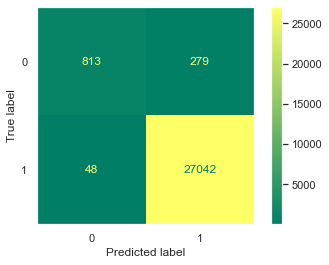

In [94]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

#conf_mat = confusion_matrix(y_test, y_pred)
#class_names=[0,1]
#print(conf_mat)
#plt.figure(figsize=(10,5))

#plt.grid(False)
plt.figure(figsize=(10,5))
plot_confusion_matrix(logisticRegr, X_test, y_test, cmap="summer",
                                colorbar=True)  
plt.grid(False)
plt.show()

In [95]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
# predict probabilities on Test and take probability for class 1([:1])
y_pred_prob_test = logisticRegr.predict_proba(X_test)[:, 1]
#predict labels on test dataset
y_pred_test = logisticRegr.predict(X_test)
# create onfusion matrix
cm = confusion_matrix(y_test, y_pred_test)
print("confusion Matrix is :\n\n",cm)
print("\n")
# ROC- AUC score
print("ROC-AUC score  test dataset:  \t", metrics.roc_auc_score(y_test,y_pred_prob_test))
#Precision score
print("precision score  test dataset:  ", metrics.precision_score(y_test,y_pred_test))
#Recall Score
print("Recall score  test dataset:  \t", metrics.recall_score(y_test,y_pred_test))
#f1 score
print("f1 score  test dataset :  \t", metrics.f1_score(y_test,y_pred_test))

confusion Matrix is :

 [[  813   279]
 [   48 27042]]


ROC-AUC score  test dataset:  	 0.9936731043043335
precision score  test dataset:   0.9897880751070605
Recall score  test dataset:  	 0.9982281284606866
f1 score  test dataset :  	 0.9939901858080168


Challenges related to imbalanced dataset

Biased predictions
Misleading accuracy
We will check with two efficient techniques: ADASYN and SMOTE+TOMEK

In [101]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [102]:
#train and test set prediction
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print("Train set accuracy:",metrics.accuracy_score(y_train, y_pred_train))
print("Test set accuracy:",metrics.accuracy_score(y_test, y_pred))

Train set accuracy: 1.0
Test set accuracy: 1.0


In [103]:
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp.nlargest(20)

age                                   0.772616
payment_term_immediate payment        0.087882
cbrt_usd_amount                       0.042696
invoice_type_non goods                0.040645
invoice_currency_code_sar             0.016304
payment_term_immediate                0.008741
invoice_class_inv                     0.007148
invoice_currency_code_usd             0.003899
payment_term_30 days from eom         0.003212
payment_term_60 days from inv date    0.003119
payment_term_30 days from inv date    0.002411
payment_term_cash on delivery         0.001778
payment_term_60 days from eom         0.001636
payment_term_90 days from eom         0.001431
payment_term_15 days from eom         0.001110
invoice_currency_code_eur             0.001029
invoice_class_dm                      0.000874
invoice_currency_code_bhd             0.000851
payment_term_45 days from inv date    0.000706
payment_term_15 days from inv date    0.000349
dtype: float64

In [106]:
### Finalise the model

X = data[['age',
       'payment_term_50% advance payment and 50% upon receiving the shipment',
       'payment_term_eom', 'payment_term_lcsight',
       'payment_term_on consignment', 'invoice_currency_code_eur',
       'invoice_currency_code_gbp', 'invoice_currency_code_kwd',
       'invoice_currency_code_qar', 'invoice_type_non goods']]
y = data[['target']]

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [108]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [109]:
num_vars = ['age']

In [110]:
data[num_vars] = scaler.fit_transform(data[num_vars])

In [111]:
scaler.fit(X_train[['age']])
X_train[['age']] = scaler.transform(X_train[['age']])

In [112]:
X_test[['age']] = scaler.transform(X_test[['age']])

In [115]:
from sklearn import metrics
print ('Accuracy: ', metrics.accuracy_score(y_test, y_pred_smt_tmk))
print ('F1 score: ', metrics.f1_score(y_test, y_pred_smt_tmk))
print ('Recall: ', metrics.recall_score(y_test, y_pred_smt_tmk))
print ('Precision: ', metrics.precision_score(y_test, y_pred_smt_tmk))
print ('\n clasification report:\n', metrics.classification_report(y_test,y_pred_smt_tmk))
print ('\n confussion matrix:\n',metrics.confusion_matrix(y_test, y_pred_smt_tmk))

NameError: name 'y_pred_smt_tmk' is not defined